In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import math

#import the data
df = pd.read_csv('S&P500.csv')


In [2]:
df.head(10)

,Date,Open,High,Low,Close,AdjClose,Volume
0,01/06/2022,4149.78,4166.54,4073.85,4101.23,4101.23,4531800000
1,02/06/2022,4095.41,4177.51,4074.37,4176.82,4176.82,4405790000
2,03/06/2022,4137.57,4142.67,4098.67,4108.54,4108.54,3711110000
3,06/06/2022,4134.72,4168.78,4109.18,4121.43,4121.43,4332700000
4,07/06/2022,4096.47,4164.86,4080.19,4160.68,4160.68,4248210000
5,08/06/2022,4147.12,4160.14,4107.20,4115.77,4115.77,4159470000
6,09/06/2022,4101.65,4119.10,4017.17,4017.82,4017.82,4134170000
7,10/06/2022,3974.39,3974.39,3900.16,3900.86,3900.86,4889640000
8,13/06/2022,3838.15,3838.15,3734.30,3749.63,3749.63,5636890000
9,14/06/2022,3763.52,3778.18,3705.68,3735.48,3735.48,5153890000


In [3]:
df.shape

(250, 7)

In [4]:
df.describe()

,Open,High,Low,Close,AdjClose,Volume
count,250.000000,250.00000,250.000000,250.000000,250.000000,2.500000e+02
mean,3969.242720,3998.85440,3939.132480,3970.570160,3970.570160,4.304416e+09
std,157.323586,151.78192,162.596673,158.873377,158.873377,8.484101e+08
min,3520.370000,3608.34000,3491.580000,3577.030000,3577.030000,1.706460e+09
25%,3852.990000,3890.09250,3817.542500,3854.762500,3854.762500,3.857698e+09
50%,3977.380000,4008.31500,3944.815000,3978.700000,3978.700000,4.143730e+09
75%,4105.065000,4136.29000,4084.465000,4109.752500,4109.752500,4.532708e+09
max,4290.460000,4325.28000,4277.770000,4305.200000,4305.200000,9.354280e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      250 non-null    object 
 1   Open      250 non-null    float64
 2   High      250 non-null    float64
 3   Low       250 non-null    float64
 4   Close     250 non-null    float64
 5   AdjClose  250 non-null    float64
 6   Volume    250 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


In [6]:
x = df[['Open','High','Low','Volume']].values
y = df['Close'].values


In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state = 0)

In [8]:
regressor = LinearRegression()

In [9]:
regressor.fit(x_train,y_train)

LinearRegression()

In [10]:
print(regressor.coef_)

[-7.82297860e-01  8.61579686e-01  9.23706840e-01  5.97785278e-10]


In [11]:
print(regressor.intercept_)

-10.832115170190264


In [12]:
predicted = regressor.predict(x_test)

In [13]:
compare = pd.DataFrame({'Orignal': y_test.flatten(),'Predicted': predicted.flatten()})

In [14]:
compare.head(10)

,Orignal,Predicted
0,4071.63,4079.458716
1,4027.26,4030.714821
2,3577.03,3592.535855
3,3990.97,4003.224672
4,3969.61,3964.822312
5,4019.81,4028.254339
6,3960.28,3943.097144
7,3640.47,3619.230661
8,3955.00,3974.555371
9,3983.17,3961.717617


In [15]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))

Mean Absolute Error: 12.809775334557452


In [16]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))

Mean Squared Error: 292.9681113479998


In [17]:
print('Root Mean Squared Error:' , math.sqrt(metrics.mean_squared_error(y_test, predicted)))                                                

Root Mean Squared Error: 17.11631126580724


In [18]:
r2_score = regressor.score(x_test,y_test)
print(r2_score*100,'%')

98.73902657952485 %


In [19]:
graph = compare.head(20)

<Axes: >

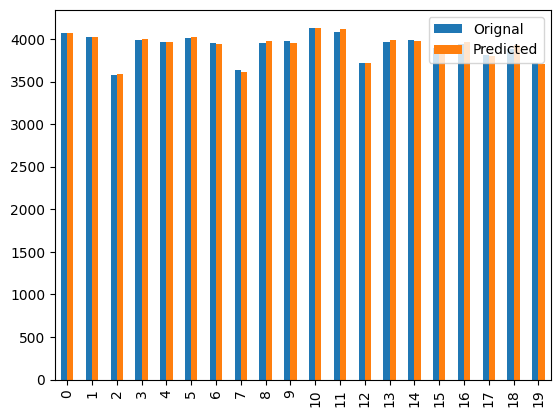

In [20]:
graph.plot(kind='bar')